# Principal Component Analysis (PCA) – Uber Pickup Behavior

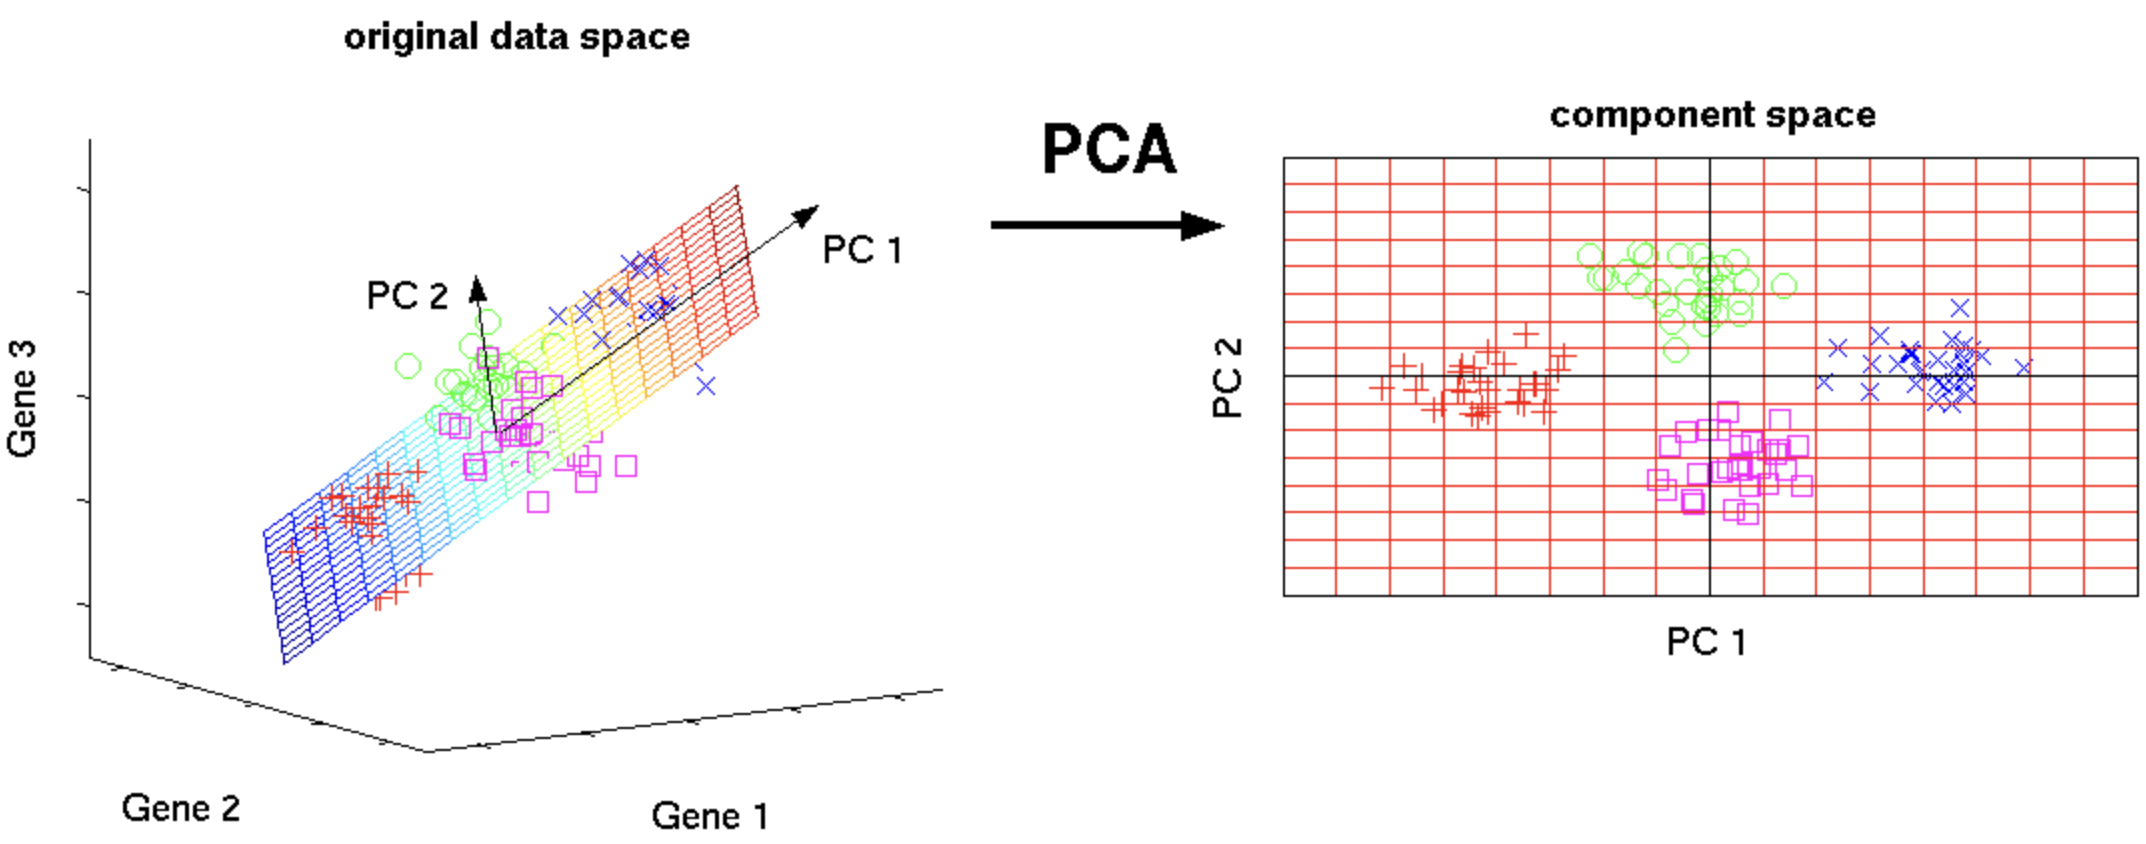

## Overview

This directory implements **Principal Component Analysis (PCA)** using a custom-built algorithm from the `rice_ml` package. PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while preserving as much variance as possible. It is especially useful for visualizing complex datasets and uncovering latent structure.

The above image illustrates how PCA works: high-dimensional data (left panel) is projected onto a new coordinate system (right panel) defined by the directions of maximum variance (principal components). Each axis in the component space captures a linear combination of the original features, simplifying the analysis of patterns and clustering.

In this project, I applied PCA to the **Uber Pickup Dataset** to uncover underlying patterns in passenger ride behavior across different times, locations, and distances.

Cloning into 'INDE577_ML_Rice_2025'...
remote: Enumerating objects: 384, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 384 (delta 17), reused 15 (delta 7), pack-reused 336 (from 1)
Receiving objects: 100% (384/384), 19.50 MiB | 16.24 MiB/s, done.
Resolving deltas: 100% (183/183), done.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


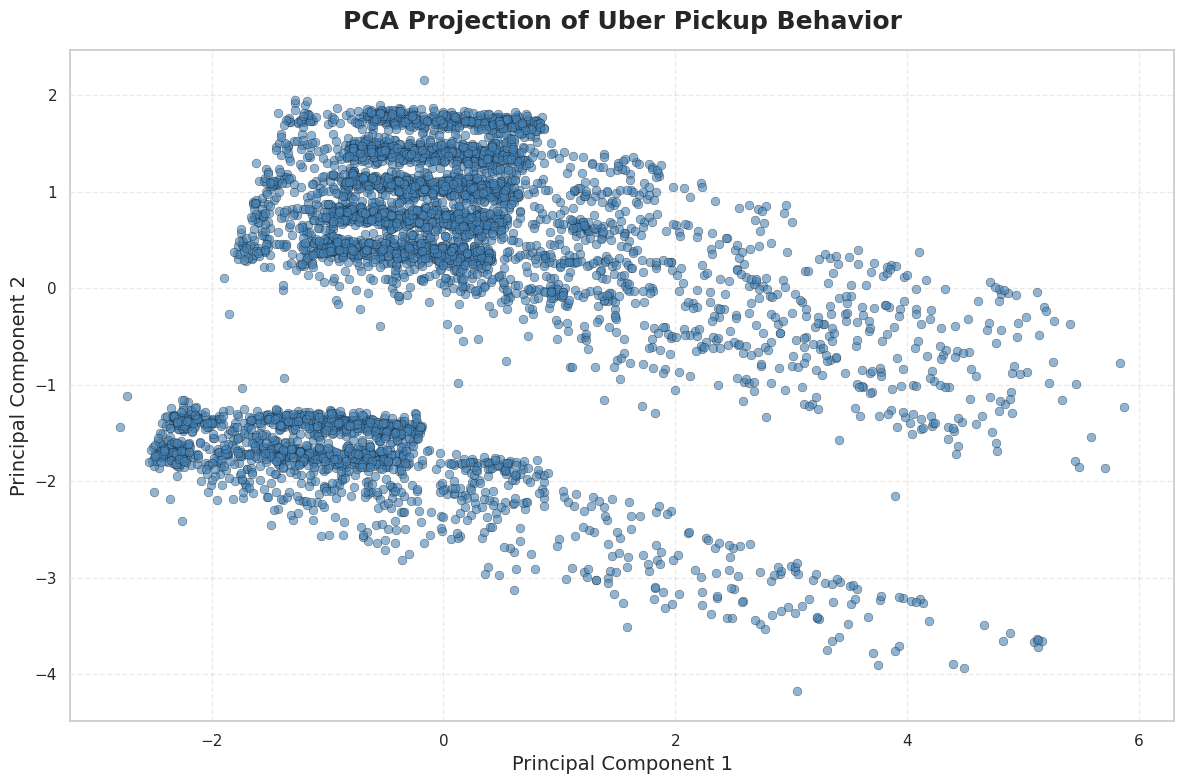

In [5]:
# Step 1: Clone the GitHub repo and import PCA model
!rm -rf INDE577_ML_Rice_2025
!git clone https://github.com/alicewang777/INDE577_ML_Rice_2025.git

import sys
sys.path.append('/content/INDE577_ML_Rice_2025')
from rice_ml.pca import PCA

# Step 2: Load packages and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from google.colab import drive

# Step 3: Mount Google Drive and load Uber dataset
drive.mount('/content/drive')
csv_path = "/content/drive/MyDrive/Colab Notebooks/ML_Rice_2025_Final_Project/uber.csv"
df = pd.read_csv(csv_path)

# Step 4: Basic cleaning and outlier removal based on coordinates and fare
df = df[(df['pickup_longitude'] != 0) & (df['dropoff_longitude'] != 0)]
df = df[df['fare_amount'] < 100]
df = df[
    (df['pickup_latitude'] > 40) & (df['pickup_latitude'] < 42) &
    (df['dropoff_latitude'] > 40) & (df['dropoff_latitude'] < 42) &
    (df['pickup_longitude'] > -75) & (df['pickup_longitude'] < -72) &
    (df['dropoff_longitude'] > -75) & (df['dropoff_longitude'] < -72)
]
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df = df.dropna()

# Step 5: Sample a subset for computational efficiency
df = df.sample(n=5000, random_state=42)

# Step 6: Feature engineering
df['minute'] = df['pickup_datetime'].dt.minute
df['hour_exact'] = df['pickup_datetime'].dt.hour + df['minute'] / 60.0
df['dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
df['manhattan_distance'] = (
    np.abs(df['pickup_longitude'] - df['dropoff_longitude']) +
    np.abs(df['pickup_latitude'] - df['dropoff_latitude'])
)
df['hour_passenger'] = df['hour_exact'] * df['passenger_count']

# Step 7: Select features and scale
features = [
    'pickup_longitude', 'pickup_latitude',
    'hour_exact', 'minute', 'dayofweek', 'is_weekend',
    'passenger_count', 'manhattan_distance', 'hour_passenger'
]
X = df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Apply PCA using custom rice_ml implementation
pca_model = PCA(n_components=2)
X_pca = pca_model.fit_transform(X_scaled)

# Step 9: Visualize the PCA projection
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=40, c='steelblue', edgecolors='black', linewidth=0.3)
plt.title("PCA Projection of Uber Pickup Behavior", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### **Visualization and Interpretation**

The figure above shows a 2D PCA projection of Uber pickup behavior using a custom PCA implementation from the `rice_ml` package. The dataset was cleaned to remove extreme outliers based on geographic coordinates and fare amounts before applying PCA.

#### Key Observations:
- The projection reveals several **distinct dense regions**, suggesting latent structure or patterns in user pickup behavior.
- Two major clusters appear vertically separated, which could reflect differences in **pickup time patterns**, such as weekday vs. weekend or morning vs. evening activity.
- The elongated spread along Principal Component 1 indicates **gradual variation in features** like passenger count or trip distance.
- Outliers and noise points are visible but do not dominate the projection, confirming successful pre-processing and meaningful dimensionality reduction.
